# Data Exploration

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

In [3]:
test = np.load("./Data/test_images.npy")
test = test/255
test.shape

(10000, 28, 28)

In [4]:
train = np.load("./Data/train_images.npy")
train = train/255
train.shape

(60000, 28, 28)

In [5]:
labels = pd.read_csv("./Data/train_labels.csv")
labels.shape

(60000, 1)

In [6]:
#Buscar validation_split en fit (keras)
train_X = train[:50000]
test_X = train[50000:]
train_y = labels[:50000].to_numpy()
test_y = labels[50000:].to_numpy()

Text(0.5, 1.0, 'Data Distribution')

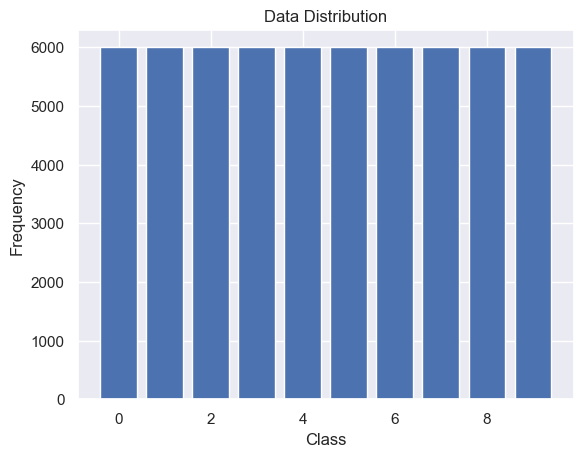

In [7]:
classes, frequency = np.unique(labels, return_counts=True)
plt.bar(classes, frequency)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Data Distribution")

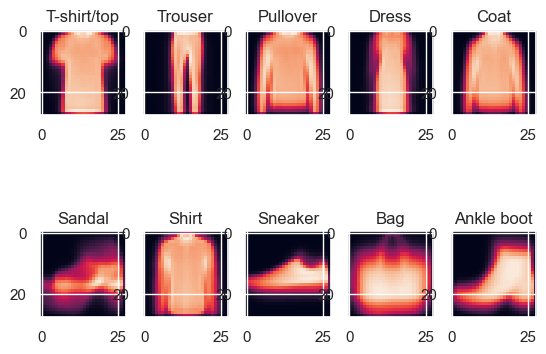

In [38]:
fig, axs = plt.subplots(2, 5)
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
meanImg = [train[labels.label.values == k].mean(axis=0).reshape(28,28) for k in range(10)]
for i in range(2):
    for j in range(5):
        axs[i][j].set_title(classes[5*i+j])
        axs[i][j].imshow(meanImg[5*i+j])

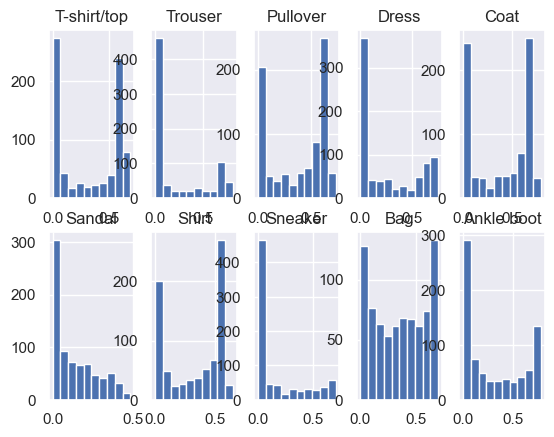

In [39]:
fig, axs = plt.subplots(2, 5)
for i in range(2):
    for j in range(5):
        axs[i][j].set_title(classes[5*i+j])
        lst = meanImg[5*i+j].flatten()
        axs[i][j].hist(lst)

Extra Analysis

In [18]:
data = train / 255.0
target = labels
data.shape

(60000, 28, 28)

In [27]:
import umap

embedding = umap.UMAP().fit_transform(data, y=target)

SystemError: initialization of _internal failed without raising an exception

ValueError: 'c' argument has 7840000 elements, which is inconsistent with 'x' and 'y' with size 28.

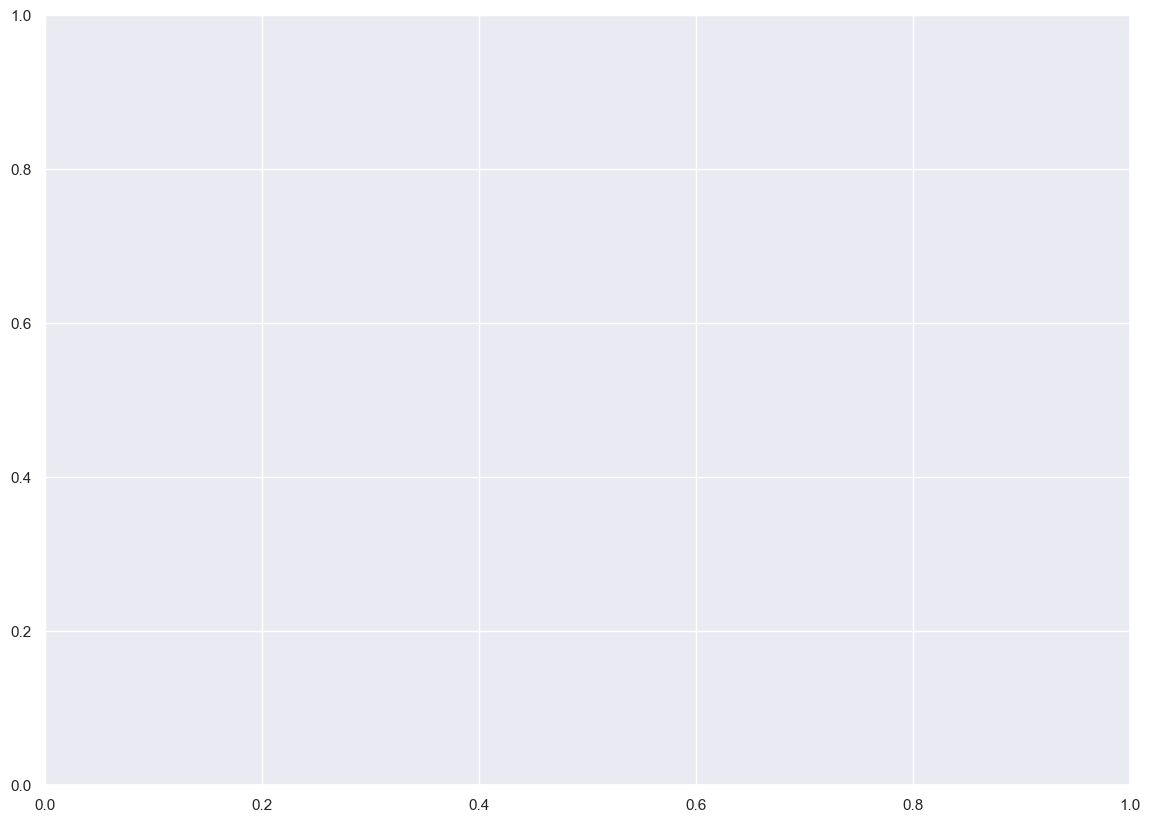

In [276]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.1, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('Fashion MNIST Embedded via UMAP using Labels');

# Model Exploration

In [37]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras.metrics import AUC, Precision, Recall, Accuracy
from tensorflow.keras.initializers import GlorotNormal, GlorotUniform, RandomNormal
from tensorflow.keras.losses import CategoricalCrossentropy, KLDivergence
from tensorflow.keras.optimizers.schedules import ExponentialDecay

In [9]:
y_sparse_train = [[0 if train_y[i]!=j else 1 for j in range(len(classes))] for i in range(len(train_y))]
y_sparse_train = np.array(y_sparse_train)
y_sparse_test = [[0 if test_y[i]!=j else 1 for j in range(len(classes))] for i in range(len(test_y))]
y_sparse_test = np.array(y_sparse_test)

Base model (before enhancement)

In [10]:
callbackES = EarlyStopping(monitor='accuracy', patience=10)
initializer = GlorotNormal()
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(BatchNormalization())
model.add(Dense(50, activation="elu", kernel_initializer=initializer))
model.add(BatchNormalization())
model.add(Dense(10, activation="softmax", kernel_initializer=initializer))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 batch_normalization_1 (Batc  (None, 50)               200       
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
Total params: 43,096
Trainable params: 41,428
Non-traina

c:\Users\Gonzalo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\initializers\initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [11]:
model.compile(loss = CategoricalCrossentropy(), optimizer=Adam(learning_rate=0.0002), metrics=["accuracy"])
history = model.fit(x= train_X, y = y_sparse_train, validation_data=(test_X, y_sparse_test), callbacks=[callbackES], batch_size = 32, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6375 - accuracy: 0.7847 - val_loss: 0.4612 - val_accuracy: 0.8371
Epoch 2/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4518 - accuracy: 0.8430 - val_loss: 0.4247 - val_accuracy: 0.8513
Epoch 3/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4141 - accuracy: 0.8552 - val_loss: 0.3938 - val_accuracy: 0.8592
Epoch 4/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3911 - accuracy: 0.8622 - val_loss: 0.3851 - val_accuracy: 0.8647
Epoch 5/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3730 - accuracy: 0.8676 - val_loss: 0.3692 - val_accuracy: 0.8675
Epoch 6/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3568 - accuracy: 0.8734 - val_loss: 0.3649 - val_accuracy: 0.8673
Epoch 7/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3465 - accuracy: 0.8748 - val_loss: 0.3526 - val_accuracy:

In [72]:
model.save("./Model/FashionMNISTBase")

INFO:tensorflow:Assets written to: ./Model/FashionMNISTBase\assets


INFO:tensorflow:Assets written to: ./Model/FashionMNISTBase\assets


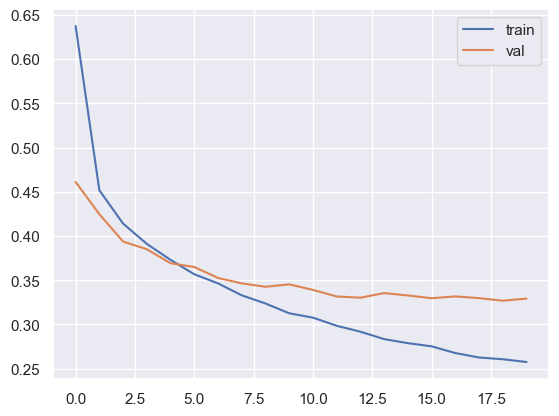

In [12]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.legend()
plt.show()

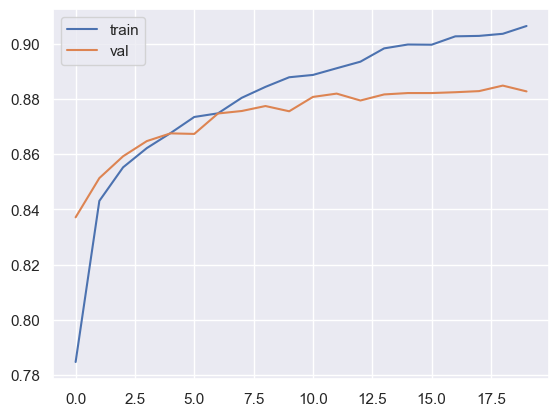

In [13]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.legend()
plt.show()

# Model Enhancement

## Accuracy vs LR

La prueba se realizo dos veces para un ajuste mas fino del LR

In [121]:
model = load_model("./Model/FashionMNISTBase")
lr = 0.0000016
acc_valResults = []

for i in range(10):
    model.compile(loss = CategoricalCrossentropy(), optimizer=Adam(learning_rate=lr), metrics=["accuracy"])
    history = model.fit(x= train_X, y = y_sparse_train, validation_data=(test_X, y_sparse_test), batch_size = 32, epochs=10)
    acc_valResults.append(history.history["val_accuracy"][-1])
    lr = lr/5


Epoch 1/10
1563/1563 [==============================] - 5s 2ms/step - loss: 0.2576 - accuracy: 0.9070 - val_loss: 0.3423 - val_accuracy: 0.8808
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2499 - accuracy: 0.9085 - val_loss: 0.3463 - val_accuracy: 0.8817
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2473 - accuracy: 0.9112 - val_loss: 0.3467 - val_accuracy: 0.8825
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2475 - accuracy: 0.9106 - val_loss: 0.3672 - val_accuracy: 0.8819
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2448 - accuracy: 0.9121 - val_loss: 0.3427 - val_accuracy: 0.8826
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2440 - accuracy: 0.9118 - val_loss: 0.3438 - val_accuracy: 0.8835
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2442 - accuracy: 0.9114 - val_loss: 0.3611 - val_accuracy:

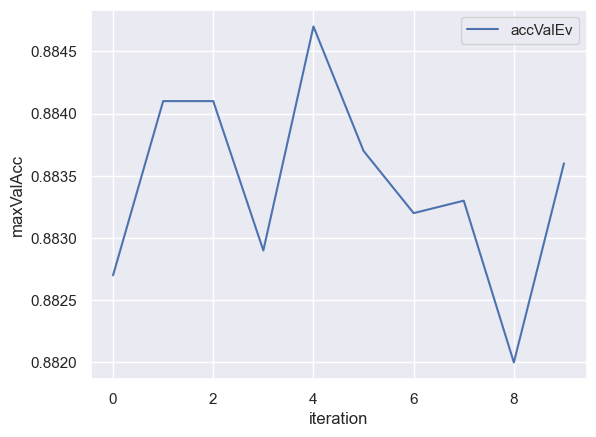

In [122]:
plt.plot(acc_valResults, label="accValEv")
plt.xlabel("iteration")
plt.ylabel("maxValAcc")
plt.legend()
plt.show()

## Accuracy vs Batchsize


In [134]:
bz = 32
acc_valResults = []

for i in range(5):
    model = load_model("./Model/FashionMNISTBase")
    model.compile(loss = CategoricalCrossentropy(), optimizer=Adam(learning_rate=0.0000016), metrics=["accuracy"])
    history = model.fit(x= train_X, y = y_sparse_train, validation_data=(test_X, y_sparse_test), batch_size = bz, epochs=10)
    acc_valResults.append(history.history["val_accuracy"][-1])
    bz = bz*2

Epoch 1/10
1563/1563 [==============================] - 5s 2ms/step - loss: 0.2638 - accuracy: 0.9051 - val_loss: 0.3458 - val_accuracy: 0.8823
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2567 - accuracy: 0.9078 - val_loss: 0.3463 - val_accuracy: 0.8824
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2581 - accuracy: 0.9062 - val_loss: 0.3385 - val_accuracy: 0.8831
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2569 - accuracy: 0.9084 - val_loss: 0.3397 - val_accuracy: 0.8830
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2550 - accuracy: 0.9077 - val_loss: 0.3392 - val_accuracy: 0.8832
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2533 - accuracy: 0.9099 - val_loss: 0.3403 - val_accuracy: 0.8827
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2547 - accuracy: 0.9086 - val_loss: 0.3396 - val_accuracy:

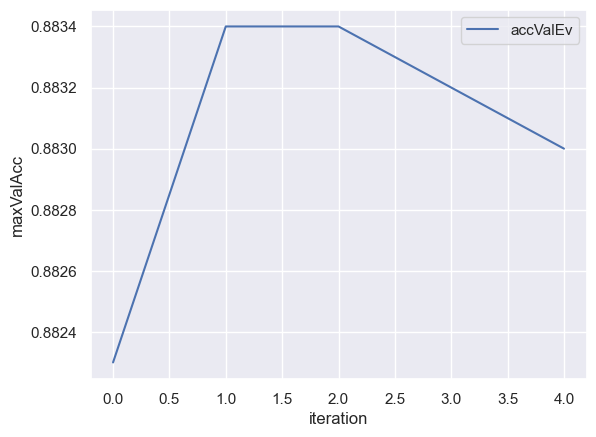

In [135]:
plt.plot(acc_valResults, label="accValEv")
plt.xlabel("iteration")
plt.ylabel("maxValAcc")
plt.legend()
plt.show()

In [136]:
opts = [SGD(0.0000016), RMSprop(0.0000016), Adam(0.0000016), Adagrad(0.0000016)]
acc_valResults = []

for i in range(4):
    model = load_model("./Model/FashionMNISTBase")
    model.compile(loss = CategoricalCrossentropy(), optimizer=opts[i], metrics=["accuracy"])
    history = model.fit(x= train_X, y = y_sparse_train, validation_data=(test_X, y_sparse_test), batch_size = 64, epochs=10)
    acc_valResults.append(history.history["val_accuracy"][-1])

Epoch 1/10
782/782 [==============================] - 4s 4ms/step - loss: 0.2457 - accuracy: 0.9108 - val_loss: 0.3537 - val_accuracy: 0.8798
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 0.2451 - accuracy: 0.9116 - val_loss: 0.3454 - val_accuracy: 0.8801
Epoch 3/10
782/782 [==============================] - 3s 4ms/step - loss: 0.2451 - accuracy: 0.9116 - val_loss: 0.3430 - val_accuracy: 0.8805
Epoch 4/10
782/782 [==============================] - 3s 4ms/step - loss: 0.2462 - accuracy: 0.9105 - val_loss: 0.3443 - val_accuracy: 0.8805
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 0.2460 - accuracy: 0.9105 - val_loss: 0.3437 - val_accuracy: 0.8804
Epoch 6/10
782/782 [==============================] - 3s 4ms/step - loss: 0.2455 - accuracy: 0.9111 - val_loss: 0.3427 - val_accuracy: 0.8806
Epoch 7/10
782/782 [==============================] - 3s 4ms/step - loss: 0.2451 - accuracy: 0.9116 - val_loss: 0.3431 - val_accuracy: 0.8812
Epoch 

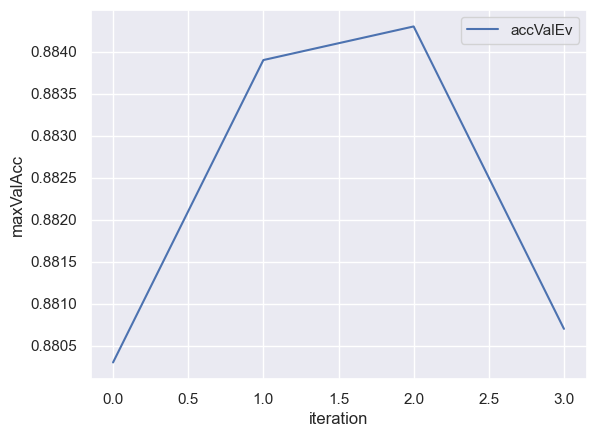

In [137]:
plt.plot(acc_valResults, label="accValEv")
plt.xlabel("iteration")
plt.ylabel("maxValAcc")
plt.legend()
plt.show()

## Accuracy vs Activations

In [153]:
activs = ["exponential","relu", "elu", "sigmoid", "tanh", "selu"]

for i in range(len(activs)):
    callbackES = EarlyStopping(monitor='accuracy', patience=3)
    initializer = GlorotNormal()
    model = Sequential()
    model.add(Flatten(input_shape=(28,28)))
    model.add(BatchNormalization())
    model.add(Dense(40, activation="relu", kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(Dense(10, activation="softmax", kernel_initializer=initializer))
    model.compile(loss = CategoricalCrossentropy(), optimizer=Adam(0.0000016), metrics=["accuracy"])
    history = model.fit(x= train_X, y = y_sparse_train, validation_data=(test_X, y_sparse_test), callbacks=[callbackES], batch_size = 64, epochs=100)
    acc_valResults.append(history.history["val_accuracy"][-1])

Epoch 1/100
782/782 [==============================] - 4s 4ms/step - loss: 2.8342 - accuracy: 0.1132 - val_loss: 6.0838 - val_accuracy: 0.1407
Epoch 2/100
782/782 [==============================] - 3s 4ms/step - loss: 2.5147 - accuracy: 0.1796 - val_loss: 8.7870 - val_accuracy: 0.2162
Epoch 3/100
782/782 [==============================] - 3s 4ms/step - loss: 2.2484 - accuracy: 0.2506 - val_loss: 5.9614 - val_accuracy: 0.3128
Epoch 4/100
782/782 [==============================] - 3s 4ms/step - loss: 2.0337 - accuracy: 0.3242 - val_loss: 4.8690 - val_accuracy: 0.3816
Epoch 5/100
782/782 [==============================] - 3s 3ms/step - loss: 1.8732 - accuracy: 0.3796 - val_loss: 668.4653 - val_accuracy: 0.4229
Epoch 6/100
782/782 [==============================] - 3s 4ms/step - loss: 1.7445 - accuracy: 0.4277 - val_loss: 2.4605 - val_accuracy: 0.4649
Epoch 7/100
782/782 [==============================] - 3s 4ms/step - loss: 1.6435 - accuracy: 0.4660 - val_loss: 5.7447 - val_accuracy: 0.49

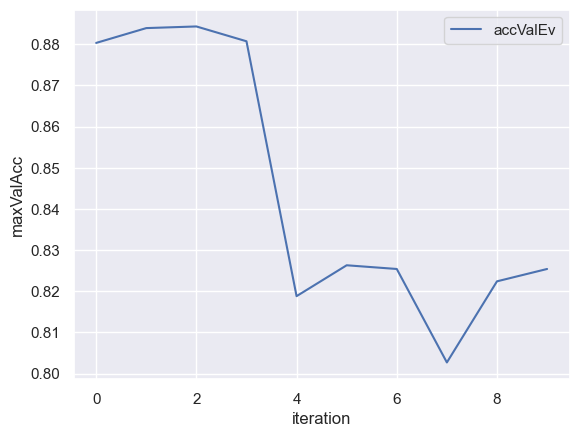

In [154]:
plt.plot(acc_valResults, label="accValEv")
plt.xlabel("iteration")
plt.ylabel("maxValAcc")
plt.legend()
plt.show()

# Model Enhanced Analysis 

In [64]:
import tensorflow_addons as tfa
import tensorflow as tf

In [66]:
BATCH_SIZE = 128
INIT_LR = 0.0002
MAX_LR = 0.002

In [75]:
steps_per_epoch = len(train_X) // BATCH_SIZE
callbackCLR = tfa.optimizers.CyclicalLearningRate(initial_learning_rate=INIT_LR,
    maximal_learning_rate=MAX_LR,
    scale_fn=lambda x: 1/(2.**(x-1)),
    step_size=2 * steps_per_epoch
)

callbackROP = ReduceLROnPlateau(monitor="val_accuracy",
                      factor = 0.1,
                      verbose= 1,
                      pacience = 20,
                      min_lr = MAX_LR)


callbackES = EarlyStopping(monitor='val_accuracy', patience=10)
initializer = GlorotNormal()
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dropout(0.1))
model.add(Dense(100, activation="elu", kernel_initializer=initializer))
model.add(Dropout(0.1))
model.add(Dense(10, activation="softmax", kernel_initializer=initializer))
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dropout_18 (Dropout)        (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 100)               78500     
                                                                 
 dropout_19 (Dropout)        (None, 100)               0         
                                                                 
 dense_35 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


c:\Users\Gonzalo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\initializers\initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [77]:
model.compile(loss = CategoricalCrossentropy(), optimizer=Adam(callbackCLR), metrics=["accuracy"])
history = model.fit(x= train_X, y = y_sparse_train, validation_data=(test_X, y_sparse_test), callbacks=[callbackES, callbackROP], batch_size = BATCH_SIZE, epochs=200)

Epoch 1/200
391/391 [==============================] - 3s 5ms/step - loss: 0.3625 - accuracy: 0.8650 - val_loss: 0.3488 - val_accuracy: 0.8719 - lr: 0.0011
Epoch 2/200
391/391 [==============================] - 2s 6ms/step - loss: 0.3799 - accuracy: 0.8575 - val_loss: 0.3716 - val_accuracy: 0.8590 - lr: 0.0020
Epoch 3/200
391/391 [==============================] - 2s 5ms/step - loss: 0.3698 - accuracy: 0.8634 - val_loss: 0.3424 - val_accuracy: 0.8739 - lr: 0.0011
Epoch 4/200
391/391 [==============================] - 2s 5ms/step - loss: 0.3487 - accuracy: 0.8702 - val_loss: 0.3239 - val_accuracy: 0.8799 - lr: 2.0346e-04
Epoch 5/200
391/391 [==============================] - 2s 5ms/step - loss: 0.3417 - accuracy: 0.8747 - val_loss: 0.3267 - val_accuracy: 0.8802 - lr: 6.5462e-04
Epoch 6/200
391/391 [==============================] - 2s 5ms/step - loss: 0.3483 - accuracy: 0.8711 - val_loss: 0.3465 - val_accuracy: 0.8744 - lr: 0.0011
Epoch 7/200
391/391 [==============================] - 2

In [78]:
model.save("./Model/FashionMNISTEnhanced")

INFO:tensorflow:Assets written to: ./Model/FashionMNISTEnhanced\assets


INFO:tensorflow:Assets written to: ./Model/FashionMNISTEnhanced\assets


In [79]:
model = load_model("./Model/FashionMNISTEnhanced", compile=False)
toSubmit = pd.DataFrame(columns=["id","Category"])
toSubmit["id"] = np.arange(len(test))
toSubmit["Category"] = np.argmax(model.predict(test), (1))
toSubmit.to_csv("./Submit/sub1.csv", index=False)

c:\Users\Gonzalo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\initializers\initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


313/313 [==============================] - 1s 1ms/step
